In [1]:
import pickle
import pandas as pd
import re
import matplotlib.pyplot as plt

with open('data/gameswap_history.pickle', 'rb') as f:
    gameswap = pickle.load(f)
with open('data/gamesale_history.pickle', 'rb') as f:
    gamesale = pickle.load(f)
with open('data/mushroomkingdom_history.pickle', 'rb') as f:
    mushroomkingdom = pickle.load(f)

In [2]:
game_total = pd.concat([gameswap,gamesale], axis=0)

# Select the rows where author is not '[deleted]' or '[removed]'
# game_total = game_total[~game_total['author'].isin(['[deleted]', '[removed]'])]
# Select the rows where reply_author is not '[deleted]' or '[removed]'
# game_total = game_total[~game_total['reply_author'].isin(['[deleted]', '[removed]'])]

pattern = r'^(.*)_(?!.*_)'
# apply the pattern to the column 'index'
game_total['user'] = game_total['index'].apply(lambda x: re.search(pattern, x).group(1))
# put the user column to the front
cols = game_total.columns.tolist()
cols = cols[-1:] + cols[:-1]
game_total = game_total[cols]

# Choose the rows where user is not 'none'
game_total = game_total[game_total['user'] != 'none']

In [3]:
pattern = r'^(.*)_(?!.*_)'
# apply the pattern to the column 'index'
game_total['user'] = game_total['index'].apply(lambda x: re.search(pattern, x).group(1))

In [4]:
game_total_2020 = game_total.loc[game_total['created_utc']<='2020-12-31']


In [5]:
game_total_2020.groupby('author').size().sort_values()

author
XboxRedditor             2
bigvow                   2
billthecatt              2
billthedancingpony       2
billybeer55555           2
                      ... 
bannjio                388
ebudd08                392
westcoaststyle         588
XDireInsanityX         598
[deleted]             1857
Length: 5077, dtype: int64

In [ ]:
(game_total.loc[game_total['subreddit']=='gameswap'].groupby('user').size()).mean()

3.315713599231139

In [4]:
(game_total.loc[game_total['subreddit']=='gamesale'].groupby('user').size()).mean()

4.640060240963855

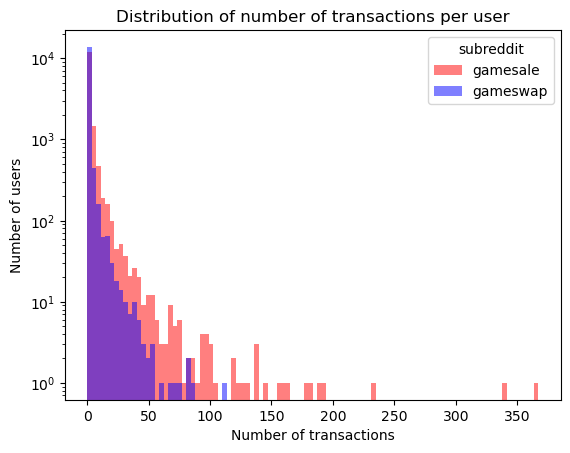

In [3]:
# Group by user and 'subreddit' and count the number of rows.
# Plot the distribution of gameswap and gamesale
# Log scale
plot_start_year = '2013-01-01'
plot_end_year = '2021-12-31'
game_two_sub = game_total.loc[(game_total['created_utc']<=plot_end_year)&
                             (game_total['created_utc']>=plot_start_year)].groupby(['user', 'subreddit']).count()['index'].unstack().fillna(0)
game_two_sub.plot(kind='hist', bins=100, logy=True, alpha=0.5,color=['red','b'])
plt.xlabel('Number of transactions')
plt.ylabel('Number of users')
plt.title('Distribution of number of transactions per user')
plt.show()

<Figure size 640x480 with 0 Axes>

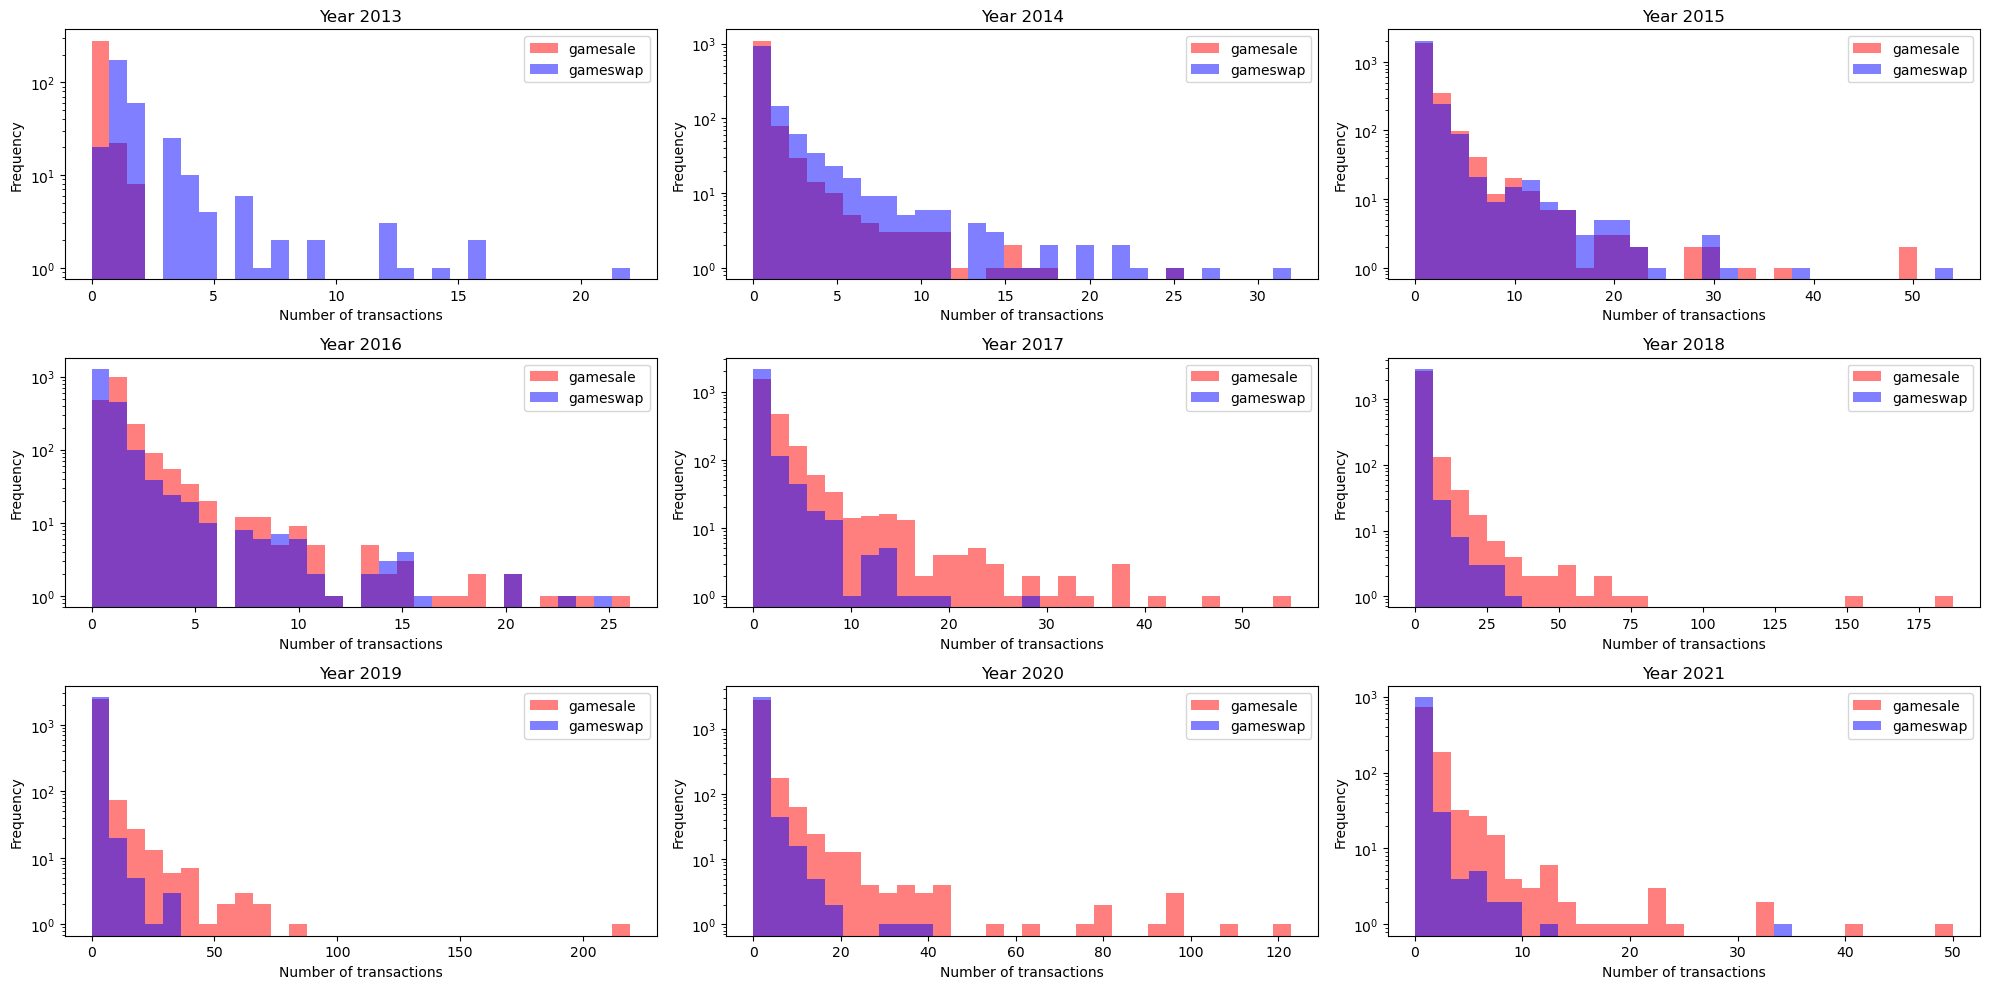

In [27]:
# Create subdataframe for each year using the 'created_utc' column from year 2013 to 2020
game_2013 = game_total.loc[game_total['created_utc']<="2013-12-31"]
game_2014 = game_total.loc[(game_total['created_utc']>="2014-01-01") & (game_total['created_utc']<="2014-12-31")]
game_2015 = game_total.loc[(game_total['created_utc']>="2015-01-01") & (game_total['created_utc']<="2015-12-31")]
game_2016 = game_total.loc[(game_total['created_utc']>="2016-01-01") & (game_total['created_utc']<="2016-12-31")]
game_2017 = game_total.loc[(game_total['created_utc']>="2017-01-01") & (game_total['created_utc']<="2017-12-31")]
game_2018 = game_total.loc[(game_total['created_utc']>="2018-01-01") & (game_total['created_utc']<="2018-12-31")]
game_2019 = game_total.loc[(game_total['created_utc']>="2019-01-01") & (game_total['created_utc']<="2019-12-31")]
game_2020 = game_total.loc[(game_total['created_utc']>="2020-01-01") & (game_total['created_utc']<="2020-12-31")]
game_2021 = game_total.loc[(game_total['created_utc']>="2021-01-01") & (game_total['created_utc']<="2021-03-31")]
game_years = [game_2013, game_2014, game_2015, game_2016, game_2017, game_2018, game_2019, game_2020, game_2021]

# Plot these subdataframes, group by user and 'subreddit' and count the number of rows.
# In a plot, plot these subdataframes in a line plot
# Plot the distribution of gameswap and gamesale in each year
plt.clf()
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for year, game_year in enumerate(game_years):
    to_plot = game_year.groupby(['user', 'subreddit']).size().unstack().fillna(0)
    # Plot the distribution of gameswap and set alpha to 0.5 ,plot the distribution of gamesale and set alpha to 1 in the same plot.
    to_plot.plot(kind='hist', alpha=0.5, ax=ax[year//3, year%3],logy=True, color=['r','blue'],bins=30)
   # legend
    ax[year//3, year%3].legend()
    # title
    ax[year//3, year%3].set_title('Year {}'.format(2013+year))
    # x label
    ax[year//3, year%3].set_xlabel('Number of transactions')
plt.tight_layout()
plt.show()



In [28]:
# for year in range(2013,2022):
#     plot_start_year = '2013-01-01'
#     plot_end_year = '%s-12-31' % year
#     game_two_sub = game_total.loc[(game_total['created_utc']<=plot_end_year)&
#                                  (game_total['created_utc']>=plot_start_year)].groupby(['user', 'subreddit']).count()['index'].unstack().fillna(0)
#     game_two_sub.plot(kind='hist', bins=50, logy=True, alpha=0.5,color=['red','b'])
#     plt.xlabel('Number of transactions')
#     plt.ylabel('Number of users')
#     plt.title('Distribution of number of transactions per user till %s'% year)
#     plt.show()

## Network

In [61]:
import networkx as nx

In [6]:
with open('data/transformed_history.pickle','rb') as f:
    df = pickle.load(f)

In [11]:
network = {}
for user1, user_list in df.items():
    network[user1] = []
    for user2 in user_list:
        network[user1].append(user2['user'])

In [32]:
temp = []
for user1, user2_list in network.items():
    for user2 in user2_list:
        temp.append(sorted([user1, user2]))
temp.sort()
df_temp = pd.DataFrame(temp, columns=['user1','user2'])

In [49]:
df_network = df_temp.groupby(['user1', 'user2']).size()//2
df_network = df_network.reset_index()

In [52]:
df_network.columns = ['user1','user2','count']

In [58]:
df_network_not_null=df_network[(df_network['user1']!='none')&(df_network['user2']!='none')]

In [59]:
df_network_not_null

,user1,user2,count
0,-----nice-----,fadedfigures,1
1,-----nice-----,mercenary0979,1
2,--blackjack-,yaoijunkieify,1
3,--el_duderino--,battlefielder696,1
4,--el_duderino--,battlehead,2
...,...,...,...
42252,youngcostanza,zinorita,1
42253,youngpushtostart,ziggygersh,1
42254,zealousidealad3821,zeroinfect,1
42255,zealousidealad3821,zsiiik,1


In [67]:
df_network_not_null.to_csv('data/network.csv',index=False)

In [62]:
G = nx.from_pandas_edgelist(df_network_not_null, 'user1','user2',edge_attr='count')

In [64]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G)

TypeError: '_AxesStack' object is not callable

<Figure size 1000x800 with 0 Axes>